<a href="https://colab.research.google.com/github/hargurjeet/LJMU_Thesis/blob/main/Baseline_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Baseline Models

In [1]:
!git clone https://github.com/hargurjeet/LJMU_Thesis.git

Cloning into 'LJMU_Thesis'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 186 (delta 10), reused 0 (delta 0), pack-reused 160 (from 1)
Receiving objects: 100% (186/186), 32.97 MiB | 25.81 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [2]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,classification_report
import numpy as np

In [3]:
df_open_ai = pd.read_csv("/content/LJMU_Thesis/Processed_output/openai_generated_output.csv")
df_open_ai.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,TextualData
0,34,No,Middle Income,6,No,Yes,0,The customer is 34 years old and has indicated...
1,34,Yes,Low Income,5,Yes,No,1,The customer is aged 34 and is a frequent flye...
2,37,No,Middle Income,3,Yes,No,0,The customer is 37 years old and is not a freq...
3,30,No,Middle Income,2,No,No,0,The customer is aged 30 and is not a frequent ...
4,30,No,Low Income,1,No,No,0,"The customer is 30 years old, does not frequen..."


In [4]:
df_open_ai.Target.value_counts()

,count
Target,
0,730
1,224


In [5]:
# Separate features and target
X = df_open_ai.drop('Target', axis=1)
y = df_open_ai['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline 1: Assign the majority class to all samples
majority_class = y_train.value_counts().idxmax()
y_pred_majority = [majority_class] * len(y_test)
baseline_majority_f1 = f1_score(y_test, y_pred_majority)
baseline_majority_accuracy = accuracy_score(y_test, y_pred_majority)
print(f"Baseline (Majority Class): F1 Score: {baseline_majority_f1:.2f}, Accuracy: {baseline_majority_accuracy:.2f}")



Baseline (Majority Class): F1 Score: 0.00, Accuracy: 0.80


In [6]:
# Baseline 2: Random class assignment
y_pred_random = np.random.choice(y_train.unique(), size=len(y_test))
baseline_random_f1 = f1_score(y_test, y_pred_random)
baseline_random_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Baseline (Random): F1 Score: {baseline_random_f1:.2f}, Accuracy: {baseline_random_accuracy:.2f}")

# Now, you can train your model and compare its performance to these baselines
# ... (Train your model, make predictions, calculate metrics) ...
print(classification_report(y_test, y_pred_random))

Baseline (Random): F1 Score: 0.29, Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       153
           1       0.20      0.53      0.29        38

    accuracy                           0.49       191
   macro avg       0.50      0.50      0.44       191
weighted avg       0.68      0.49      0.54       191



In [7]:
print(classification_report(y_test, y_pred_majority))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       153
           1       0.00      0.00      0.00        38

    accuracy                           0.80       191
   macro avg       0.40      0.50      0.44       191
weighted avg       0.64      0.80      0.71       191



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


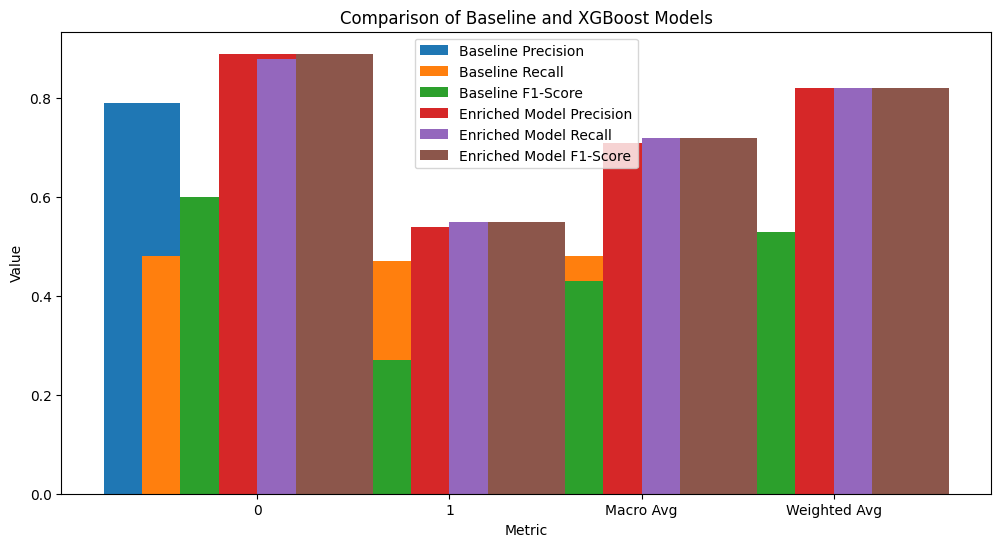

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classification report data
baseline_report = {
    'Class': ['0', '1', 'Macro Avg', 'Weighted Avg'],
    # 'Class': ['0', '1',],
    'Precision': [0.79, 0.19, 0.49, 0.67],
    'Recall': [0.48, 0.47, 0.48, 0.48],
    'F1-Score': [0.60, 0.27, 0.43, 0.53]
}

xgboost_report = {
    'Class': ['0', '1', 'Macro Avg', 'Weighted Avg'],
    # 'Class': ['0', '1',],
    'Precision': [0.89, 0.54, 0.71, 0.82],
    'Recall': [0.88, 0.55, 0.72, 0.82],
    'F1-Score': [0.89, 0.55, 0.72, 0.82]
}

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set the x-axis labels
x = np.arange(len(baseline_report['Class']))

# Plot the bar chart
ax.bar(x - 0.2, baseline_report['Precision'], 0.4, label='Baseline Precision')
ax.bar(x, baseline_report['Recall'], 0.4, label='Baseline Recall')
ax.bar(x + 0.2, baseline_report['F1-Score'], 0.4, label='Baseline F1-Score')
ax.bar(x + 0.4, xgboost_report['Precision'], 0.4, label='Enriched Model Precision')
ax.bar(x + 0.6, xgboost_report['Recall'], 0.4, label='Enriched Model Recall')
ax.bar(x + 0.8, xgboost_report['F1-Score'], 0.4, label='Enriched Model F1-Score')

# Set the x-axis tick labels
ax.set_xticks(x + 0.4)
ax.set_xticklabels(baseline_report['Class'])

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Comparison of Baseline and XGBoost Models')
ax.legend()

# Show the plot
plt.show()